# Report

Summary your findings and motivate your choice of approach. A better motivation show your understanding of the lab. Dont forget to include the result from part 1!

**Name:** Jan Dalheimer \
**Date:** 2022-10-28

## Introduction

This was a fun lab, I got stuck for a while on forcing an overfitting model for question 7 (because I tried increasing the number of layers rather than number of nodes), once I got past however the rest went very smoothly. I still feel that my knowledge of numpy is my biggest weakness, PyTorch and machine learning wise I feel like I got a good hang of the parts covered by this lab.

I also feel that I finally (after several years and multiple courses) have understood the relationship between epochs, model complexity, training loss and validation loss (things like caping the number of epochs or reducing the network complexity on overfitting, increasing the epochs if both losses are still decreasing and increasing the model complexity if both losses flatten out).

## Result

### Question 1

The 100 samples are put into batches of 2, and `100/2` equals 50, that is, we get 50 batches.

### Question 2

I also wanted to get some visualizations in TensorBoard, so I added that, as well as visualization of how the decision boundary moves during training (based on the code for plotting the decision boundary).

```python
def make_histogram(dataset, model):
    xmin, xmax = dataset[:, 0].min() - 1, dataset[:, 0].max() + 1
    ymin, ymax = dataset[:, 1].min() - 1, dataset[:, 1].max() + 1
    steps = 250
    x_span = np.linspace(xmin, xmax, steps)
    y_span = np.linspace(ymin, ymax, steps)
    xx, yy = np.meshgrid(x_span, y_span)
    model.eval()
    labels_predicted = model(Variable(torch.from_numpy(np.c_[xx.ravel(), yy.ravel()]).float()))
    labels_predicted = [0 if value <= 0.5 else 1 for value in labels_predicted.detach().numpy()]
    z = np.array(labels_predicted).reshape(xx.shape)
    zmin = z.argmin(axis=0)
    zmax = z.argmax(axis=0)
    return yy[zmin, 0], yy[zmax, 0]

def train(epoch_number, optimizer, loss, model, train_loader, valid_loader=None, lr=0.001):
    writer = SummaryWriter()
    
    opt = optimizer(model.parameters(), lr=lr)
    for epoch in range(epoch_number):
        model.train()
        train_loss = 0
        for batch_idx, (inputs, labels) in enumerate(train_loader):
            opt.zero_grad()
            outputs = model(inputs)
            l = loss(outputs, labels)
            l.backward()
            opt.step()
            writer.add_scalar("Loss/batch", l, epoch*len(train_loader) + batch_idx)
            train_loss += l.item()
            if (batch_idx % 10) == 0:
                print("\r[Batch {} of Epoch {}]\t Loss:{}".format(batch_idx, epoch, l), end="")
        train_loss /= len(train_loader)
        writer.add_scalar("Loss/train", train_loss, (epoch + 1) * len(train_loader) - 1)
        
        hist = make_histogram(train_loader.dataset.tensors[0], model)
        writer.add_histogram("Boundary/a", hist[0], (epoch + 1) * len(train_loader) - 1)
        writer.add_histogram("Boundary/b", hist[1], (epoch + 1) * len(train_loader) - 1)
        
        valid_loss = 0
        if valid_loader:
            model.eval()
            for inputs, labels in valid_loader:
                outputs = model(inputs)
                l = loss(outputs, labels)
                valid_loss += l.item()
            valid_loss /= len(valid_loader)
            writer.add_scalar("Loss/valid", valid_loss, (epoch + 1) * len(valid_loader) - 1)
    writer.add_graph(model, next(iter(train_loader))[0])
```

### Question 3

```python
my_model = NeuralNet(2, 1, 1)
```

### Question 4

I use `np.random.permutation` to get a shuffled list of array indices, by using that when accessing the data (like `x1[p]`) I get a shuffled list which I can subscript as normal for each of the splits.

```python
p = np.random.permutation(1300)

x1, y1 = datasets.syn1(1300)
x2, y2 = datasets.syn2(1300)
x3, y3 = datasets.syn3(1300)

x1_train, x1_valid, x1_test = torch.Tensor(x1[p][:200]), torch.Tensor(x1[p][200:300]), torch.Tensor(x1[p][300:])
y1_train, y1_valid, y1_test = torch.Tensor(y1[p][:200]).unsqueeze(1), torch.Tensor(y1[p][200:300]).unsqueeze(1), torch.Tensor(y1[p][300:]).unsqueeze(1)
x2_train, x2_valid, x2_test = torch.Tensor(x2[p][:200]), torch.Tensor(x2[p][200:300]), torch.Tensor(x2[p][300:])
y2_train, y2_valid, y2_test = torch.Tensor(y2[p][:200]).unsqueeze(1), torch.Tensor(y2[p][200:300]).unsqueeze(1), torch.Tensor(y2[p][300:]).unsqueeze(1)
x3_train, x3_valid, x3_test = torch.Tensor(x3[p][:200]), torch.Tensor(x3[p][200:300]), torch.Tensor(x3[p][300:])
y3_train, y3_valid, y3_test = torch.Tensor(y3[p][:200]).unsqueeze(1), torch.Tensor(y3[p][200:300]).unsqueeze(1), torch.Tensor(y3[p][300:]).unsqueeze(1)

train_1, valid_1, test_1 = TensorDataset(x1_train, y1_train), TensorDataset(x1_valid, y1_valid), TensorDataset(x1_test, y1_test)
train_2, valid_2, test_2 = TensorDataset(x2_train, y2_train), TensorDataset(x2_valid, y2_valid), TensorDataset(x2_test, y2_test)
train_3, valid_3, test_3 = TensorDataset(x3_train, y3_train), TensorDataset(x3_valid, y3_valid), TensorDataset(x3_test, y3_test)

train_1_loader, valid_1_loader, test_1_loader = DataLoader(train_1, batch_size=2), DataLoader(valid_1, batch_size=2), DataLoader(test_1, batch_size=2)
train_2_loader, valid_2_loader, test_2_loader = DataLoader(train_2, batch_size=2), DataLoader(valid_2, batch_size=2), DataLoader(test_2, batch_size=2)
train_3_loader, valid_3_loader, test_3_loader = DataLoader(train_3, batch_size=2), DataLoader(valid_3, batch_size=2), DataLoader(test_3, batch_size=2)

data_distribution(dict(
    train1=(x1_train, y1_train),
    train2=(x2_train, y2_train),
    train3=(x3_train, y3_train),
    valid1=(x1_valid, y1_valid),
    valid2=(x2_valid, y2_valid),
    valid3=(x3_valid, y3_valid),
    test1=(x1_test, y1_test),
    test2=(x2_test, y2_test),
    test3=(x3_test, y3_test)
), shape=(3, 3))
```

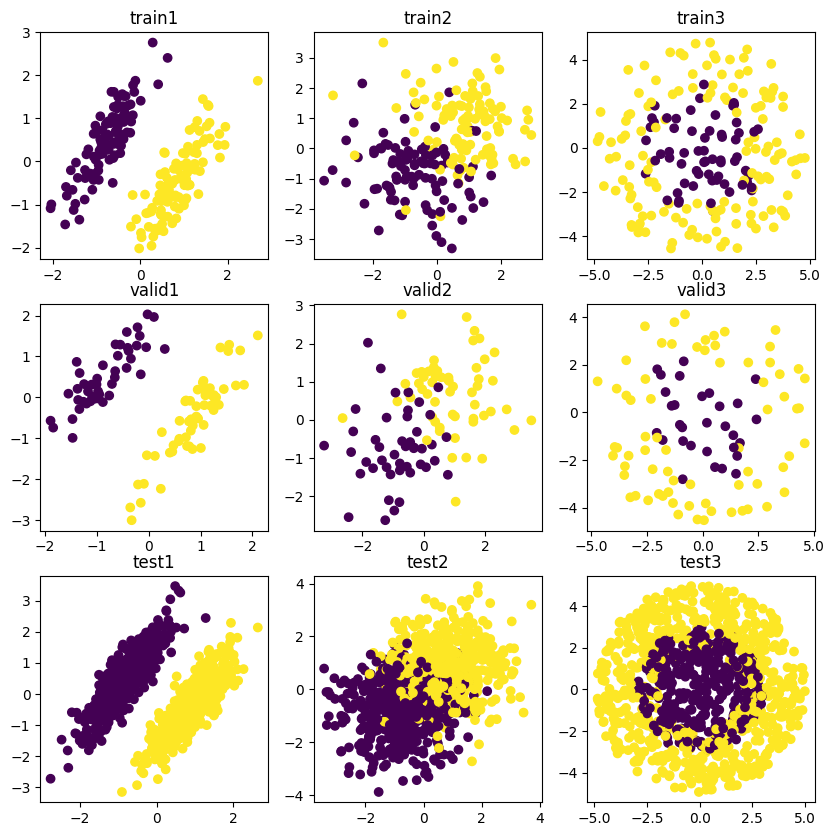

### Question 5


At least 1 hidden node is required, because the decision boundrary is linear we could do with just a single Perceptron without any non-linear activation function, but since we have a hidden layer it needs to contain at least one node (otherwise it wouldn't pass anything through).

The number of epochs required depend on the learning rate; with the default setting (0.001) around 15 epochs seem to suffice. Higher learning rate with lower number of epochs risk overshoting, while lower learning rate with more epochs take longer and have a higher risk of getting stuck in local minima. I have however observed that depending on the networks initialization the network might not finish training within 15 epochs (the line isn't "at the right angle" yet).

Since the problem is so simple all three splits result in 1.0 on all three performance indicators.

```python
model_1 = NeuralNet(2, 1, 1)
train(15, optimizer, loss, model_1, train_1_loader)
plot_decision_boundary(x1_train, y1_train, model_1);
stats_class(x1_train, y1_train, model_1);
stats_class(x1_valid, y1_valid, model_1);
stats_class(x1_test, y1_test, model_1);
```

### Question 6

Since the problem is still linear the same model works. However, this model cannot achieve 100% accuracy like the previous when linear, since it is not possible to linearly separate the classes because of the "outliers".

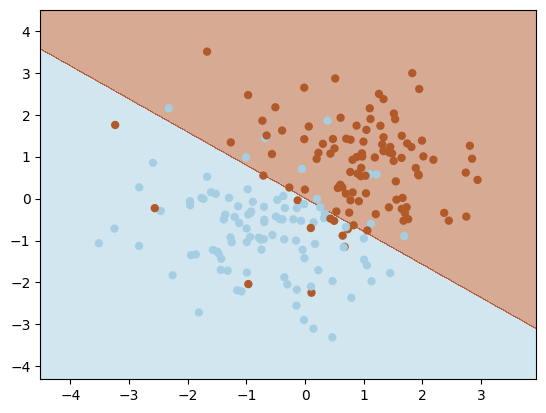

Statistics:

| Split | Accuracy | Sensitivity | Specificity |
|-------|----------|-------------|-------------|
| Training | 0.89 | 0.88 | 0.90 |
| Validation | 0.88 | 0.90 | 0.84 |
| Test | 0.87 | 0.89 | 0.86 |

### Question 7

With two hidden layers of 50 nodes each and 1000 epochs, and a batch size of 10, I got the following result:

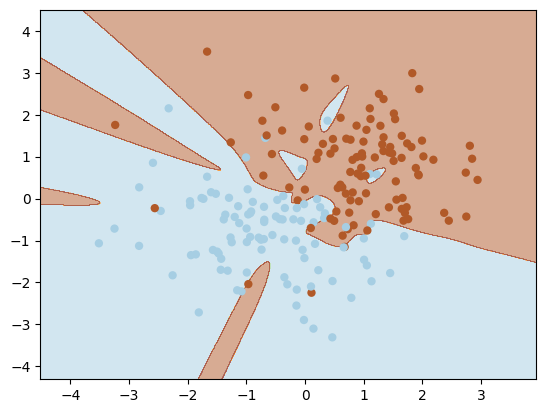

Statistics:

| Split | Accuracy | Sensitivity | Specificity |
|-------|----------|-------------|-------------|
| Training | 0.97 | 0.97 | 0.97 |
| Validation | 0.81 | 0.84 | 0.78 |
| Test | 0.82 | 0.84 | 0.81 |

This is a classical overfitting model; while the training data achives great results the validation and test splits did not improve, but rather got worse. This can also clearly be seen when plotting the loss of the training contra the validation split:

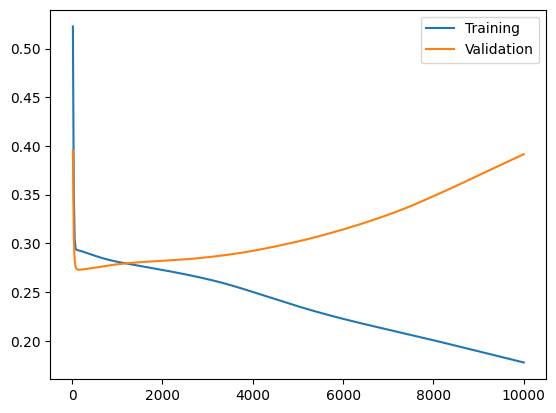

This is because the three splits all contain slightly different outliers, so while improving the accuracy of the training split is possible, doing the same for all three splits is almost impossible (we could theoretically train on the entire population, however in practice that is almost never possible). We have trained a model that works very well for the training data, but not for other samples of the same population, it is overfitting.

### Question 8

Using the same architecture (two hidden layers à 50 nodes and 1000 epochs) gives roughly the same result:

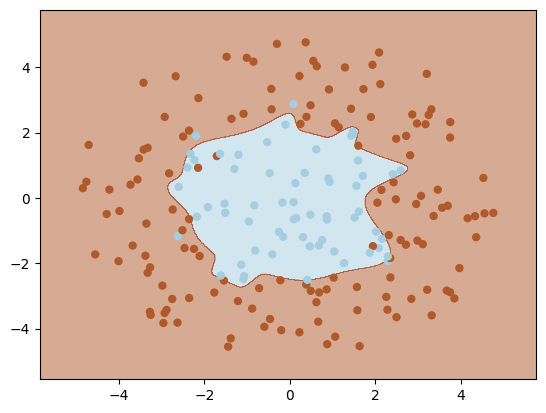

| Split | Accuracy | Sensitivity | Specificity |
|-------|----------|-------------|-------------|
| Training | 0.96 | 0.98 | 0.92 |
| Validation | 0.89 | 0.93 | 0.80 |
| Test | 0.82 | 0.89 | 0.67 |

That is, the model is again overfitting.

### Question 9

While exploring the loss curves I pinpointed the bend of the validation loss to at about a hundred epochs, training for only that many epochs gives us:

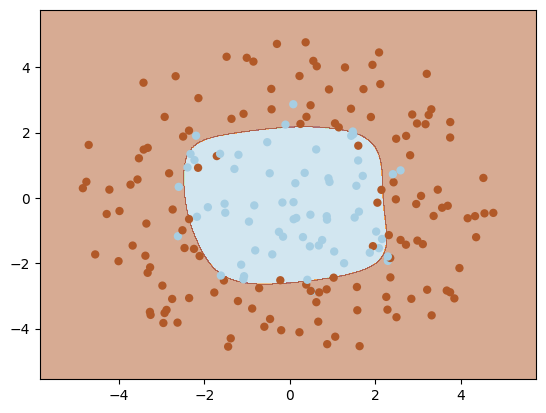

| Split | Accuracy | Sensitivity | Specificity |
|-------|----------|-------------|-------------|
| Training | 0.91 | 0.95 | 0.81 |
| Validation | 0.89 | 0.93 | 0.80 |
| Test | 0.83 | 0.90 | 0.69 |

The quantitative results are only marginally better, however looking at the decision boundary we can see that the model fits the data reasonable well and that it would be hard to get a better model.

### Question 10

Not normalized:

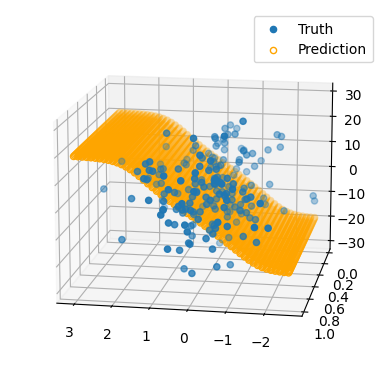

(MSE of 2.75)

Normalized:

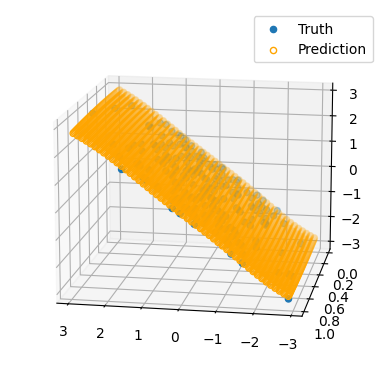

(MSE of 0.0075)

As expected normalizing the data gave better results, as normalized data helps the learning process.

### Question 11

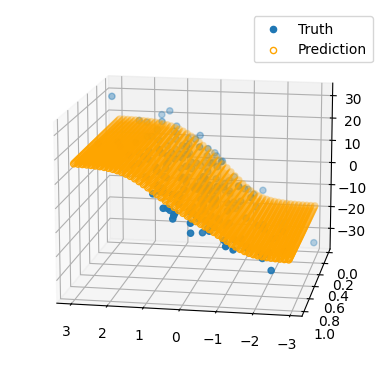

(MSE of 19.95)

By adding noise we got data that is harder to fit a function to, requiring a more complex function with a higher risk of overfitting.

### Question 12

No. Overfitting is what happens when the function that the network approximates fits a sample of the population (specifically, the training sample) really well, while not being representative of the population as a whole. Thus, if all we have is the training split (it being our entire population) a perfect function for that data would also be a perfect function for the population.

### Question 13

I got a reasonably good model using 3 hidden layers with 50 nodes each, and 40 epochs (after which the model started overfitting).

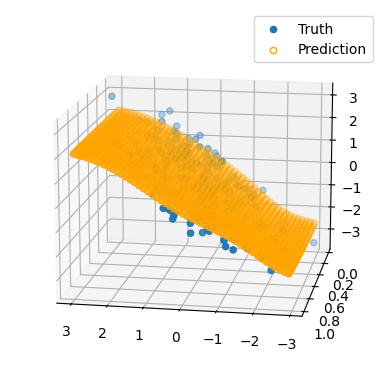

MSE of 0.176 for training split, 0.189 for validation split and 0.188 for test split.

